In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('../Data/1645792390_cep1_dataset.xlsx')
df = pd.DataFrame(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Initial Analysis of Dataset

#### Changing column name 

In [4]:
df.columns = ['age', 'sex', 'cp', 'restbps', 'chol', 'fast_bsug', 'rest_ecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [5]:
df.head()

,age,sex,cp,restbps,chol,fast_bsug,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### prelimary analysis

In [6]:
print('The shape of the data is:', df.shape)

The shape of the data is: (303, 14)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3   restbps    303 non-null    int64  
 4   chol       303 non-null    int64  
 5   fast_bsug  303 non-null    int64  
 6   rest_ecg   303 non-null    int64  
 7   thalach    303 non-null    int64  
 8   exang      303 non-null    int64  
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    int64  
 11  ca         303 non-null    int64  
 12  thal       303 non-null    int64  
 13  target     303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Examing Missing Values

In [8]:
df.isnull().sum()

age          0
sex          0
cp           0
restbps      0
chol         0
fast_bsug    0
rest_ecg     0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [9]:
isnull_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_num.append(x)

pd.DataFrame(isnull_num, index = df.columns, columns=["Total missing values"])

,Total missing values
age,0
sex,0
cp,0
restbps,0
chol,0
fast_bsug,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

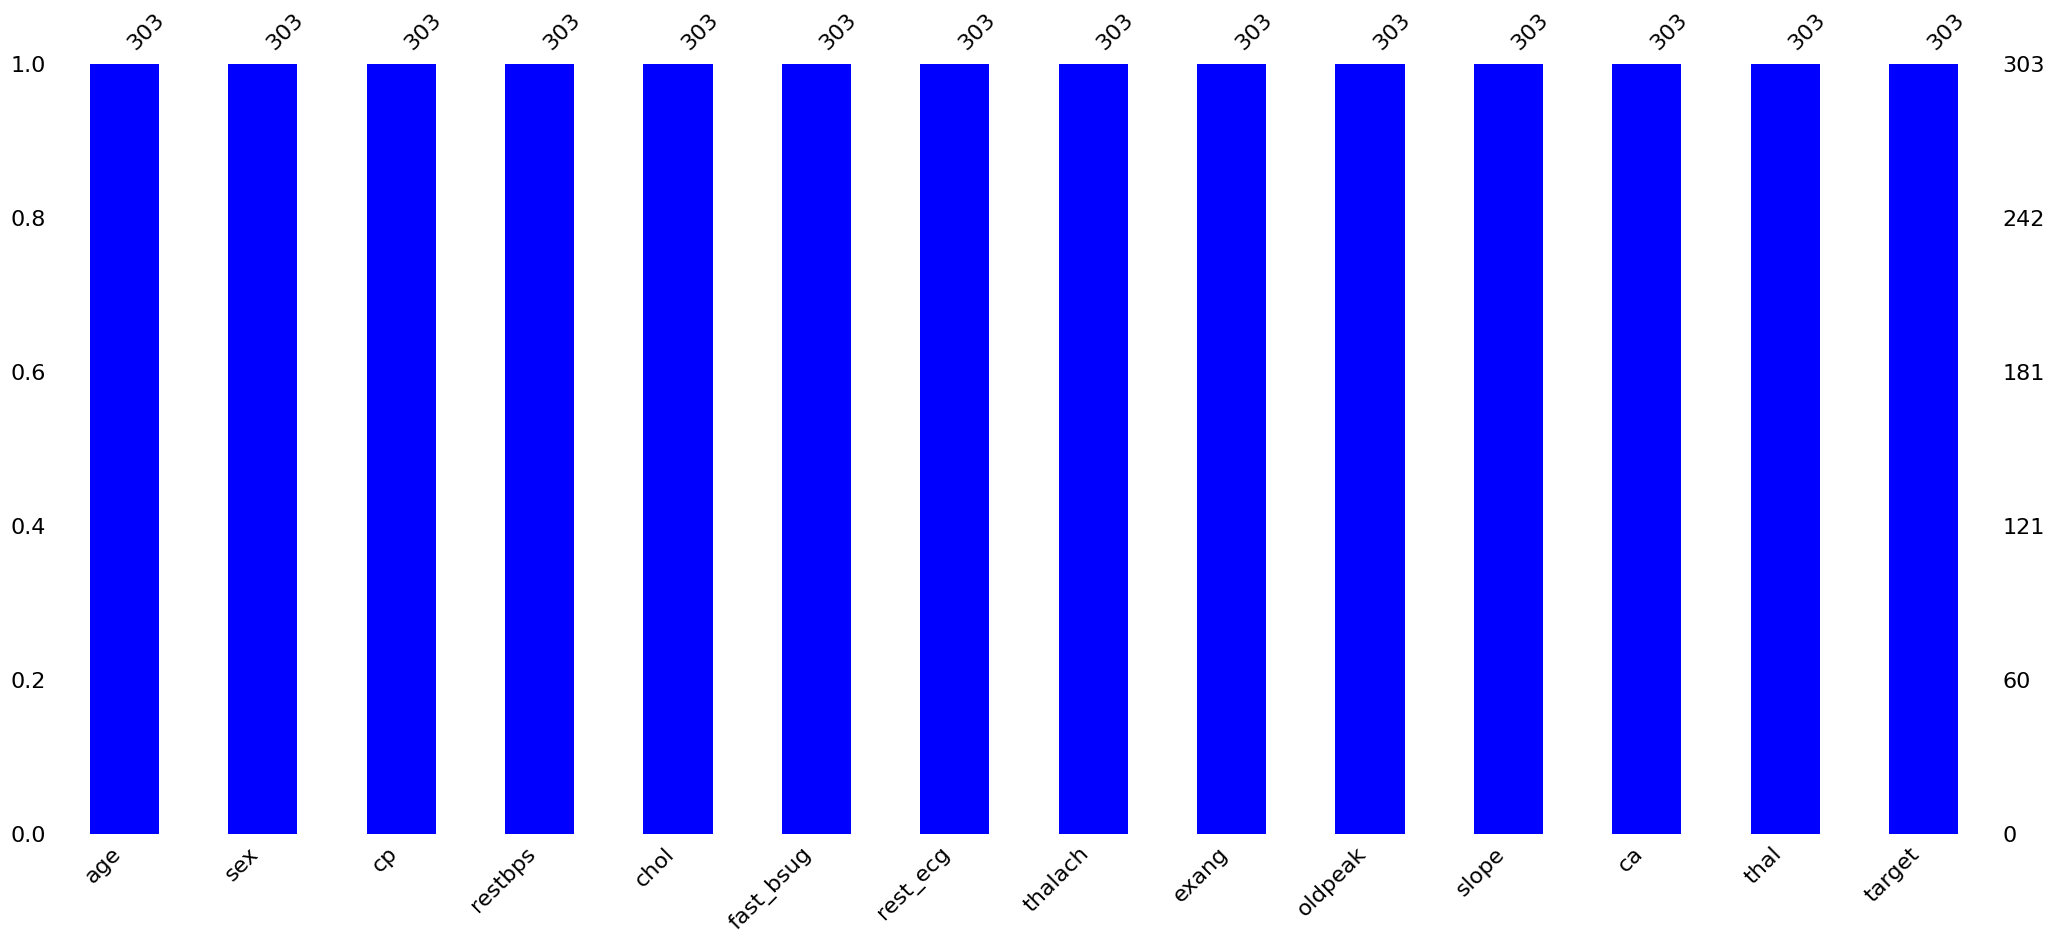

In [10]:
import missingno as msn
msn.bar(df, color='blue')

#### Unique Values

In [11]:
df.head()

,age,sex,cp,restbps,chol,fast_bsug,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
isuniq_num = []
for i in df.columns:
    x = df[i].value_counts().count()
    isuniq_num.append(x)

pd.DataFrame(isuniq_num, index=df.columns, columns=['Total Unique Values'])

,Total Unique Values
age,41
sex,2
cp,4
restbps,49
chol,152
fast_bsug,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


#### Separating Catagorical and Numerical
* want to analyze for skew
* less skew, closer to normal distribution, more accurate ML model
* varibles that are not normally dist. will use techinics to change

In [13]:
# From the unique value table
num_var = ['age', 'restbps', 'chol', 'thalach', 'oldpeak']
cat_var = ['sex', 'cp', 'fast_bsug', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

### Statistics of Varibles

In [14]:
df[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
restbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [15]:
for i in num_var:
    ol = np.percentile(df[i], 75+1.5)
    print('the 75th perc of', i, '=', np.percentile(df[i], 75))
    print('The num var upper outliers of', i, 'is',ol)

the 75th perc of age = 61.0
The num var upper outliers of age is 61.03
the 75th perc of restbps = 140.0
The num var upper outliers of restbps is 140.0
the 75th perc of chol = 274.5
The num var upper outliers of chol is 277.03
the 75th perc of thalach = 166.0
The num var upper outliers of thalach is 168.0
the 75th perc of oldpeak = 1.6
The num var upper outliers of oldpeak is 1.8


In [16]:
df['restbps']

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: restbps, Length: 303, dtype: int64

#### Numeric Variables

C:\Users\alvancim\AppData\Local\Temp\ipykernel_11640\1141190403.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], hist_kws=dict(linewidth=1, edgecolor='red'))


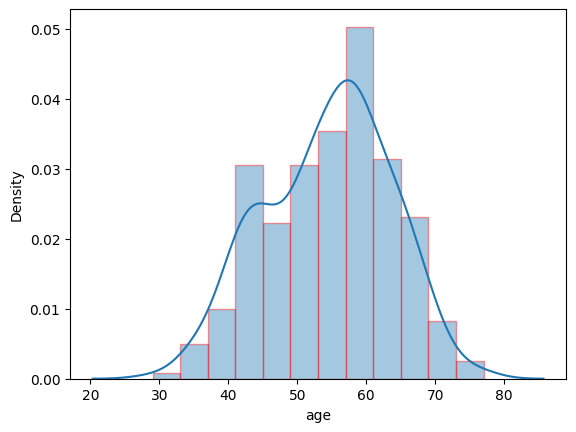

In [17]:
# looking at age percentiles, likely normal dist.

sns.distplot(df['age'], hist_kws=dict(linewidth=1, edgecolor='red'))
plt.show()

C:\Users\alvancim\AppData\Local\Temp\ipykernel_11640\1565350686.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['restbps'], hist_kws=dict(linewidth=1, edgecolor='red'), bins=20)


<Axes: xlabel='restbps', ylabel='Density'>

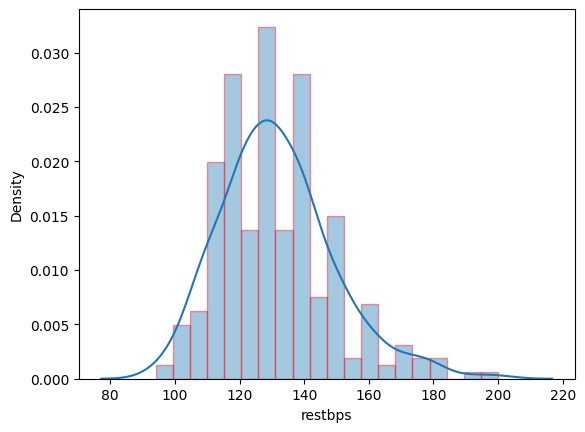

In [18]:
sns.distplot(df['restbps'], hist_kws=dict(linewidth=1, edgecolor='red'), bins=20)

#skewed left

In [19]:
num_var

['age', 'restbps', 'chol', 'thalach', 'oldpeak']

C:\Users\alvancim\AppData\Local\Temp\ipykernel_11640\1192105772.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], hist=False)


<Axes: xlabel='chol', ylabel='Density'>

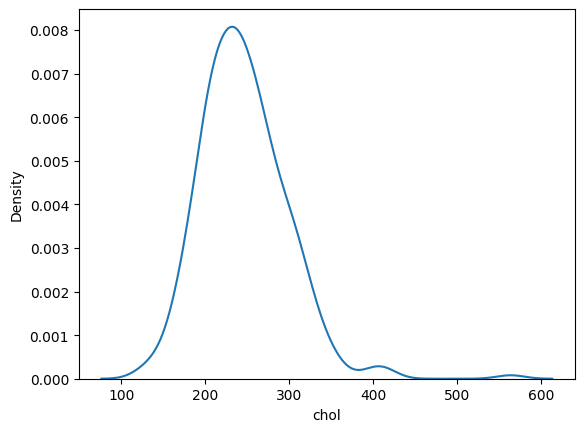

In [20]:
sns.distplot(df['chol'], hist=False)

# strong left skew, deal with later

C:\Users\alvancim\AppData\Local\Temp\ipykernel_11640\3255067544.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalach'], hist=False, ax = y)


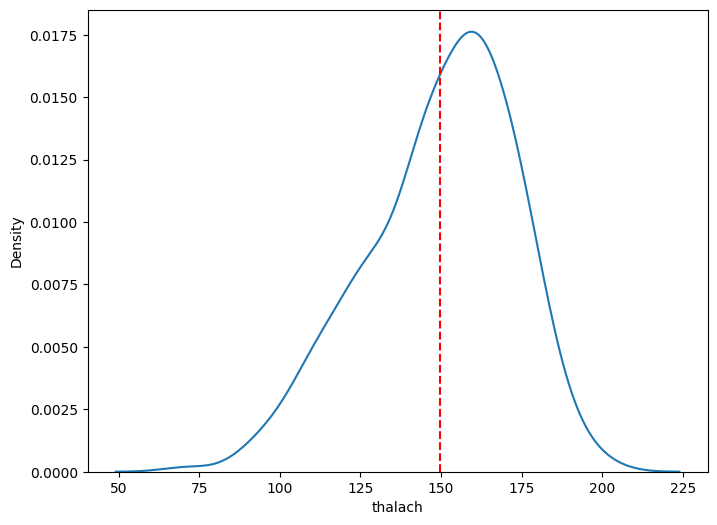

In [21]:
x,y = plt.subplots(figsize = (8,6))

sns.distplot(df['thalach'], hist=False, ax = y)
y.axvline(df['thalach'].mean(), color = "r", ls="--")

In [22]:
num_var

['age', 'restbps', 'chol', 'thalach', 'oldpeak']

C:\Users\alvancim\AppData\Local\Temp\ipykernel_11640\4159548548.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['oldpeak'], hist_kws=dict(linewidth=1, edgecolor='red'), bins=20)


<Axes: xlabel='oldpeak', ylabel='Density'>

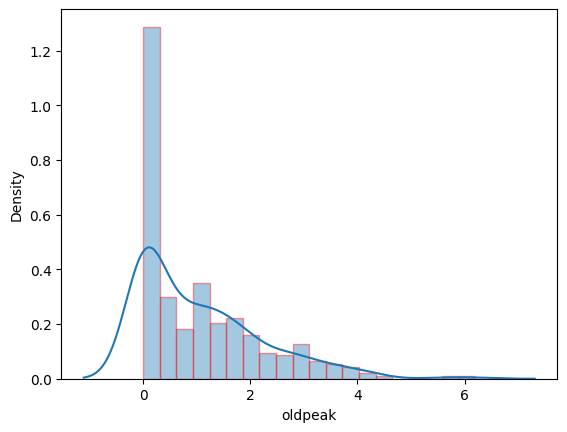

In [23]:
sns.distplot(df['oldpeak'], hist_kws=dict(linewidth=1, edgecolor='red'), bins=20)


C:\Users\alvancim\AppData\Local\Temp\ipykernel_11640\3145483544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist_kws=dict(linewidth=1, edgecolor='red'), bins=25)


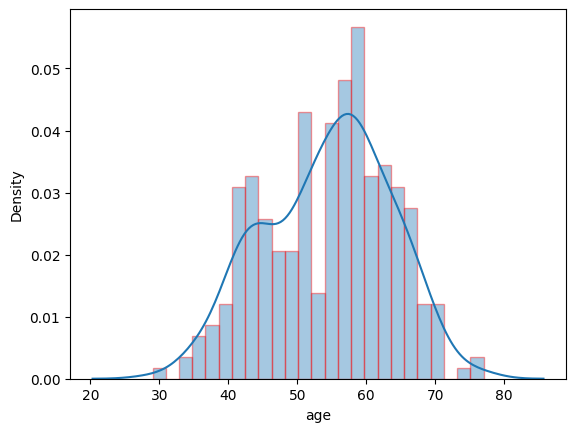

C:\Users\alvancim\AppData\Local\Temp\ipykernel_11640\3145483544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist_kws=dict(linewidth=1, edgecolor='red'), bins=25)


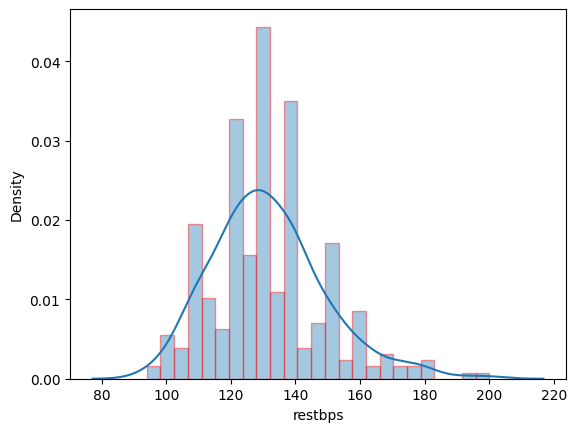

C:\Users\alvancim\AppData\Local\Temp\ipykernel_11640\3145483544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist_kws=dict(linewidth=1, edgecolor='red'), bins=25)


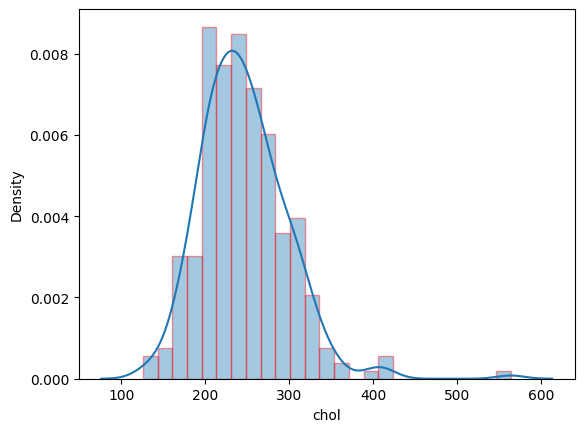

C:\Users\alvancim\AppData\Local\Temp\ipykernel_11640\3145483544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist_kws=dict(linewidth=1, edgecolor='red'), bins=25)


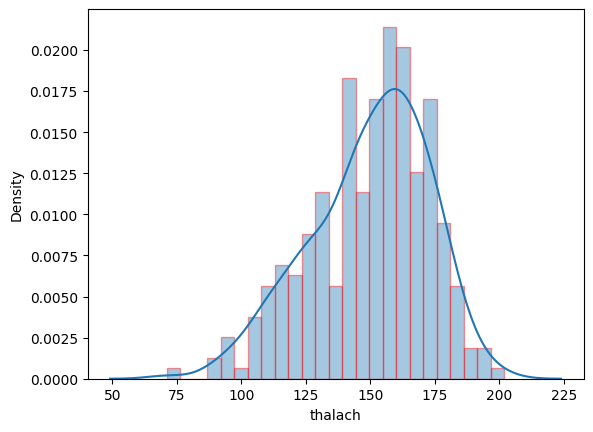

C:\Users\alvancim\AppData\Local\Temp\ipykernel_11640\3145483544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist_kws=dict(linewidth=1, edgecolor='red'), bins=25)


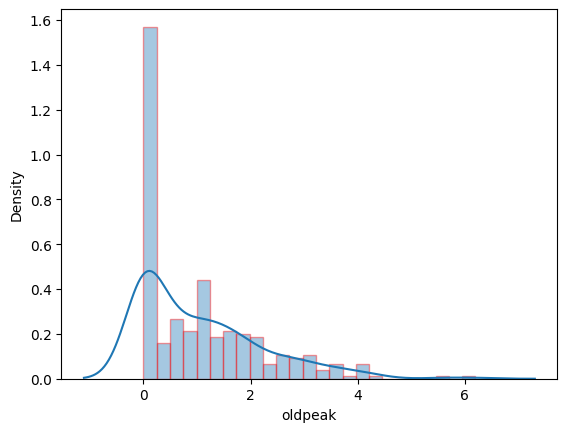

In [24]:
for i in num_var:
    sns.distplot(df[i], hist_kws=dict(linewidth=1, edgecolor='red'), bins=25)
    plt.show()


### Numeric Variable Analysis conclusion
* age normally dist. with no outliers, odd dip around 49
* Resting blood pressure (restbps) slightly skew left
* Cholesterol (chol) very skewed to left with outliers 
* skewed hard to the right
* old peak skewed to left, highly concetrated btw (0, 1.25)

In [38]:
l = df.loc[df['oldpeak'] <= .2
           ]
l.value_counts()
l.value_counts().count()

117